# Precip Compare: Wet Day Spell Length, 1981-2011

Compare the wet day spell length samples among two datasets for the period 1981-2011.

1. PRISM (actual data)
2. LOCA (downscaled GCM results)

Negative binomial distributions have been fit to all of these data sets using R in separate Jupyter notebooks. The purpose of this notebook is to compare the fitted distributions and samples to see how different they are from each other.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats

Parameters, primarily input file names

In [3]:
PRISM_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rech' \
           r'arge\Data\JNotes\Processed\PRISM\WetDays_1981-2010.pickle'
JAN_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jan_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
FEB_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Feb_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
MAR_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Mar_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
APR_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Apr_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
MAY_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\May_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
JUN_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jun_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
JUL_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jul_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
AUG_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Aug_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
SEP_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Sep_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
OCT_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Oct_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
NOV_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Nov_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
DEC_CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Dec_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'

In [4]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\Precip_Compare_1981-2010'

In [5]:
LOCA_GRID_END = 168       # the last LOCA grid cell

## Load Files

### Load and Reduce DataFrames

In [6]:
PrismDF = pd.read_pickle( PRISM_IN )

In [7]:
display( HTML( PrismDF.head().to_html() ) )

,Grid_Id,Year,Month,Day,Wet_Count,Total_Depth,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19
0,662328,1981,1,6,1,1.31,1.31,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,662328,1981,1,9,1,7.96,7.96,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,662328,1981,1,11,1,0.32,0.32,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,662328,1981,1,14,1,0.70,0.70,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,662328,1981,1,17,3,12.92,1.08,5.27,6.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
JanPRDF = PrismDF[PrismDF["Month"] == 1].copy()
FebPRDF = PrismDF[PrismDF["Month"] == 2].copy()
MarPRDF = PrismDF[PrismDF["Month"] == 3].copy()
AprPRDF = PrismDF[PrismDF["Month"] == 4].copy()
MayPRDF = PrismDF[PrismDF["Month"] == 5].copy()
JunPRDF = PrismDF[PrismDF["Month"] == 6].copy()
JulPRDF = PrismDF[PrismDF["Month"] == 7].copy()
AugPRDF = PrismDF[PrismDF["Month"] == 8].copy()
SepPRDF = PrismDF[PrismDF["Month"] == 9].copy()
OctPRDF = PrismDF[PrismDF["Month"] == 10].copy()
NovPRDF = PrismDF[PrismDF["Month"] == 11].copy()
DecPRDF = PrismDF[PrismDF["Month"] == 12].copy()

In [9]:
del PrismDF

In [10]:
JANCmipDF = pd.read_pickle( JAN_CMIP5_IN )

In [11]:
display( HTML( JANCmipDF.tail().to_html() ) )

,MGrid_Id,Year,Month,Day,Wet_Count,Total_Depth,Grid_Id,Model_Id
23161065,M9_99,2010,1,2,1,1.112280,99,9
23161066,M9_99,2010,1,9,1,0.256401,99,9
23161067,M9_99,2010,1,11,1,1.798105,99,9
23161068,M9_99,2010,1,19,2,1.149773,99,9
23161069,M9_99,2010,1,28,1,0.268588,99,9


In [12]:
FEBCmipDF = pd.read_pickle( FEB_CMIP5_IN )
MARCmipDF = pd.read_pickle( MAR_CMIP5_IN )
APRCmipDF = pd.read_pickle( APR_CMIP5_IN )
MAYCmipDF = pd.read_pickle( MAY_CMIP5_IN )
JUNCmipDF = pd.read_pickle( JUN_CMIP5_IN )
JULCmipDF = pd.read_pickle( JUL_CMIP5_IN )
AUGCmipDF = pd.read_pickle( AUG_CMIP5_IN )
SEPCmipDF = pd.read_pickle( SEP_CMIP5_IN )
OCTCmipDF = pd.read_pickle( OCT_CMIP5_IN )
NOVCmipDF = pd.read_pickle( NOV_CMIP5_IN )
DECCmipDF = pd.read_pickle( DEC_CMIP5_IN )

Need to split CMIP5 data by grid id and then by month.

In [13]:
JanLODF = JANCmipDF[JANCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
FebLODF = FEBCmipDF[FEBCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
MarLODF = MARCmipDF[MARCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
AprLODF = APRCmipDF[APRCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
MayLODF = MAYCmipDF[MAYCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
JunLODF = JUNCmipDF[JUNCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
JulLODF = JULCmipDF[JULCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
AugLODF = AUGCmipDF[AUGCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
SepLODF = SEPCmipDF[SEPCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
OctLODF = OCTCmipDF[OCTCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
NovLODF = NOVCmipDF[NOVCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
DecLODF = DECCmipDF[DECCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()

In [14]:
del JANCmipDF
del FEBCmipDF
del MARCmipDF
del APRCmipDF
del MAYCmipDF
del JUNCmipDF
del JULCmipDF
del AUGCmipDF
del SEPCmipDF
del OCTCmipDF
del NOVCmipDF
del DECCmipDF

## Comparisons by Month

In [15]:
SPRMean = list()
SPRMeanMinCI = list()
SPRMeanMaxCI = list()
SPRVar = list()
SPRVarMinCI = list()
SPRVarMaxCI = list()
SPRStd = list()
SPRStdMinCI = list()
SPRStdMaxCI = list()

In [16]:
SLOMean = list()
SLOMeanMinCI = list()
SLOMeanMaxCI = list()
SLOVar = list()
SLOVarMinCI = list()
SLOVarMaxCI = list()
SLOStd = list()
SLOStdMinCI = list()
SLOStdMaxCI = list()

In [17]:
SBCMean = list()
SBCMeanMinCI = list()
SBCMeanMaxCI = list()
SBCVar = list()
SBCVarMinCI = list()
SBCVarMaxCI = list()
SBCStd = list()
SBCStdMinCI = list()
SBCStdMaxCI = list()

In [18]:
CompQs = [ round(x * 0.05, 2) for x in range(21) ]
nCompQs = np.array( CompQs, dtype=np.float32 )
nCompQs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
      dtype=float32)

### Jan

In [19]:
JanNum = 1

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [20]:
JanPrBSCI = sstats.bayes_mvs( np.array( JanPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [21]:
JanPrBSCI

(Mean(statistic=1.866391995291348, minmax=(1.851690205342579, 1.8810937852401168)),
 Variance(statistic=1.3573107609953716, minmax=(1.3330879323214146, 1.3815335896693286)),
 Std_dev(statistic=1.16503680671272, minmax=(1.154641071344365, 1.1754325420810747)))

In [22]:
JanPrBSCI[0][0], JanPrBSCI[0][1][0], JanPrBSCI[0][1][1]

(1.866391995291348, 1.851690205342579, 1.8810937852401168)

In [23]:
SPRMean.append( JanPrBSCI[0][0] )
SPRMeanMinCI.append( JanPrBSCI[0][1][0] )
SPRMeanMaxCI.append( JanPrBSCI[0][1][1] )
SPRVar.append( JanPrBSCI[1][0] )
SPRVarMinCI.append( JanPrBSCI[1][1][0] )
SPRVarMaxCI.append( JanPrBSCI[1][1][1] )
SPRStd.append( JanPrBSCI[2][0] )
SPRStdMinCI.append( JanPrBSCI[2][1][0] )
SPRStdMaxCI.append( JanPrBSCI[2][1][1] )

In [24]:
JanLOBSCI = sstats.bayes_mvs( np.array( JanLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [25]:
SLOMean.append( JanLOBSCI[0][0] )
SLOMeanMinCI.append( JanLOBSCI[0][1][0] )
SLOMeanMaxCI.append( JanLOBSCI[0][1][1] )
SLOVar.append( JanLOBSCI[1][0] )
SLOVarMinCI.append( JanLOBSCI[1][1][0] )
SLOVarMaxCI.append( JanLOBSCI[1][1][1] )
SLOStd.append( JanLOBSCI[2][0] )
SLOStdMinCI.append( JanLOBSCI[2][1][0] )
SLOStdMaxCI.append( JanLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [26]:
JanTTPRtoLO = sstats.ttest_ind( np.array( JanPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JanLODF["Wet_Count"], dtype=np.int32 ) )

In [27]:
JanTTPRtoLOPval = JanTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % JanTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0.635149


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [28]:
JanMWUPRtoLO = sstats.mannwhitneyu( np.array( JanPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JanLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [29]:
JanMWUPRtoLOPval = JanMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % JanMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0.000372865


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [30]:
JanKWPRtoLO = sstats.kruskal( np.array( JanPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JanLODF["Wet_Count"], dtype=np.int32 ) )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5879: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


In [31]:
JanKWPRtoLOPval = JanKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % JanKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [32]:
JanLODF["Wet_Count"].median(), JanPRDF["Wet_Count"].median()

(1.0, 2.0)

#### Plots

In [33]:
JanPRQs = JanPRDF["Wet_Count"].quantile(q=nCompQs)
JanLOQs = JanLODF["Wet_Count"].quantile(q=nCompQs)

In [35]:
maxQs = max( JanPRQs.max(), JanLOQs.max() )
maxQs = maxQs + 4.0
maxQs

17.0

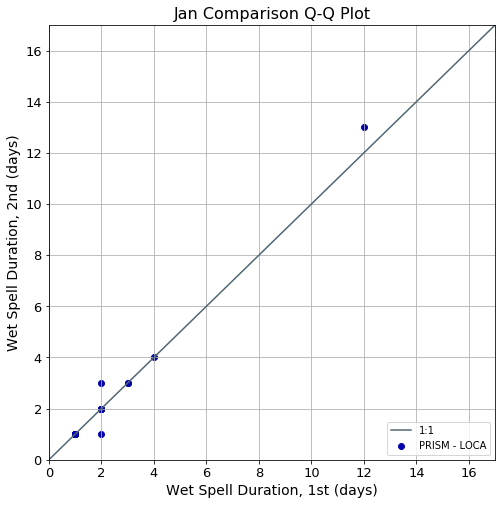

In [36]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanPRQs, JanLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

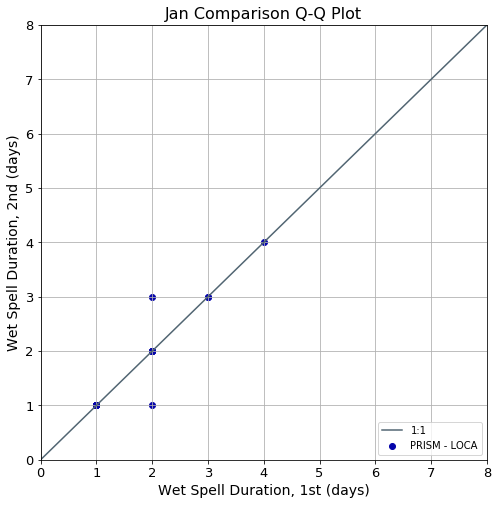

In [37]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanPRQs, JanLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 8.0) )
ax11.set_ylim( (0.0, 8.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

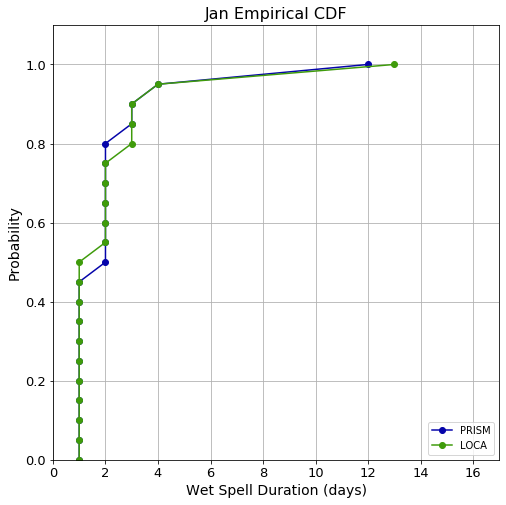

In [38]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JanPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( JanLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Jan Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Feb

In [39]:
FebNum = 2

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [40]:
FebPrBSCI = sstats.bayes_mvs( np.array( FebPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [41]:
FebPrBSCI

(Mean(statistic=1.8157389635316699, minmax=(1.802526716514521, 1.8289512105488188)),
 Variance(statistic=1.1093038467090286, minmax=(1.0896242161157572, 1.1289834773023)),
 Std_dev(statistic=1.0532349437371646, minmax=(1.043892474276627, 1.0625774131977024)))

In [42]:
FebPrBSCI[0][0], FebPrBSCI[0][1][0], FebPrBSCI[0][1][1]

(1.8157389635316699, 1.802526716514521, 1.8289512105488188)

In [43]:
SPRMean.append( FebPrBSCI[0][0] )
SPRMeanMinCI.append( FebPrBSCI[0][1][0] )
SPRMeanMaxCI.append( FebPrBSCI[0][1][1] )
SPRVar.append( FebPrBSCI[1][0] )
SPRVarMinCI.append( FebPrBSCI[1][1][0] )
SPRVarMaxCI.append( FebPrBSCI[1][1][1] )
SPRStd.append( FebPrBSCI[2][0] )
SPRStdMinCI.append( FebPrBSCI[2][1][0] )
SPRStdMaxCI.append( FebPrBSCI[2][1][1] )

In [44]:
FebLOBSCI = sstats.bayes_mvs( np.array( FebLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [45]:
SLOMean.append( FebLOBSCI[0][0] )
SLOMeanMinCI.append( FebLOBSCI[0][1][0] )
SLOMeanMaxCI.append( FebLOBSCI[0][1][1] )
SLOVar.append( FebLOBSCI[1][0] )
SLOVarMinCI.append( FebLOBSCI[1][1][0] )
SLOVarMaxCI.append( FebLOBSCI[1][1][1] )
SLOStd.append( FebLOBSCI[2][0] )
SLOStdMinCI.append( FebLOBSCI[2][1][0] )
SLOStdMaxCI.append( FebLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [46]:
FebTTPRtoLO = sstats.ttest_ind( np.array( FebPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( FebLODF["Wet_Count"], dtype=np.int32 ) )

In [47]:
FebTTPRtoLOPval = FebTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % FebTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 1.46743e-67


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [48]:
FebMWUPRtoLO = sstats.mannwhitneyu( np.array( FebPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( FebLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [49]:
FebMWUPRtoLOPval = FebMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % FebMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 2.20526e-46


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [50]:
FebKWPRtoLO = sstats.kruskal( np.array( FebPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( FebLODF["Wet_Count"], dtype=np.int32 ) )

In [51]:
FebKWPRtoLOPval = FebKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % FebKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [52]:
FebLODF["Wet_Count"].median(), FebPRDF["Wet_Count"].median()

(2.0, 2.0)

#### Plots

In [53]:
FebPRQs = FebPRDF["Wet_Count"].quantile(q=nCompQs)
FebLOQs = FebLODF["Wet_Count"].quantile(q=nCompQs)

In [55]:
maxQs = max( FebPRQs.max(), FebLOQs.max() )
maxQs = maxQs + 5.0
maxQs

18.0

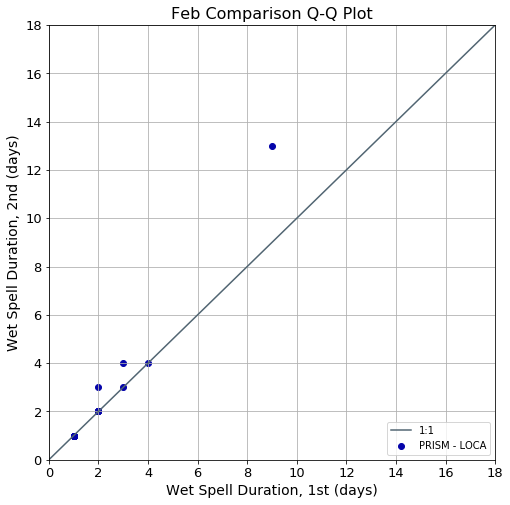

In [56]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebPRQs, FebLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

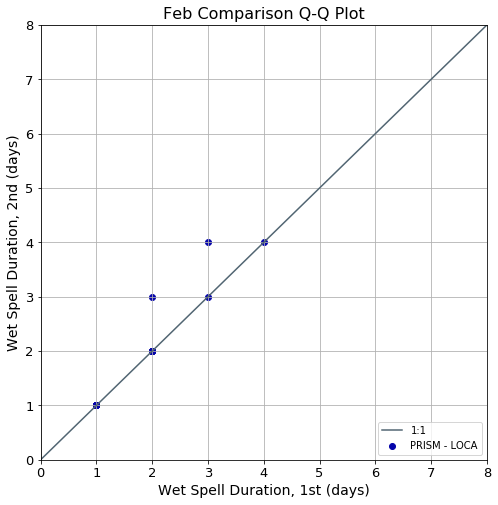

In [57]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebPRQs, FebLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 8.0) )
ax11.set_ylim( (0.0, 8.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

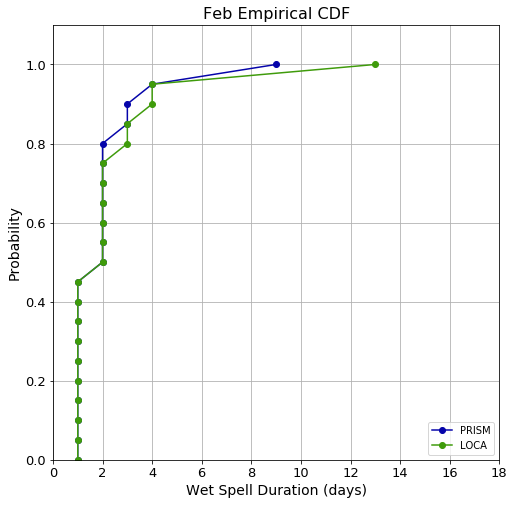

In [58]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( FebPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( FebLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Feb Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Mar

In [59]:
MarNum = 3

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [60]:
MarPrBSCI = sstats.bayes_mvs( np.array( MarPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [61]:
MarPrBSCI

(Mean(statistic=1.7617886178861788, minmax=(1.7495488036599136, 1.774028432112444)),
 Variance(statistic=1.1578416597652343, minmax=(1.1392158822984018, 1.176467437232067)),
 Std_dev(statistic=1.0760305106107513, minmax=(1.0673756549708955, 1.084685366250607)))

In [62]:
MarPrBSCI[0][0], MarPrBSCI[0][1][0], MarPrBSCI[0][1][1]

(1.7617886178861788, 1.7495488036599136, 1.774028432112444)

In [63]:
SPRMean.append( MarPrBSCI[0][0] )
SPRMeanMinCI.append( MarPrBSCI[0][1][0] )
SPRMeanMaxCI.append( MarPrBSCI[0][1][1] )
SPRVar.append( MarPrBSCI[1][0] )
SPRVarMinCI.append( MarPrBSCI[1][1][0] )
SPRVarMaxCI.append( MarPrBSCI[1][1][1] )
SPRStd.append( MarPrBSCI[2][0] )
SPRStdMinCI.append( MarPrBSCI[2][1][0] )
SPRStdMaxCI.append( MarPrBSCI[2][1][1] )

In [64]:
MarLOBSCI = sstats.bayes_mvs( np.array( MarLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [65]:
SLOMean.append( MarLOBSCI[0][0] )
SLOMeanMinCI.append( MarLOBSCI[0][1][0] )
SLOMeanMaxCI.append( MarLOBSCI[0][1][1] )
SLOVar.append( MarLOBSCI[1][0] )
SLOVarMinCI.append( MarLOBSCI[1][1][0] )
SLOVarMaxCI.append( MarLOBSCI[1][1][1] )
SLOStd.append( MarLOBSCI[2][0] )
SLOStdMinCI.append( MarLOBSCI[2][1][0] )
SLOStdMaxCI.append( MarLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [66]:
MarTTPRtoLO = sstats.ttest_ind( np.array( MarPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MarLODF["Wet_Count"], dtype=np.int32 ) )

In [67]:
MarTTPRtoLOPval = MarTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % MarTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 5.77762e-51


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [68]:
MarMWUPRtoLO = sstats.mannwhitneyu( np.array( MarPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MarLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [69]:
MarMWUPRtoLOPval = MarMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % MarMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 6.87785e-30


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [70]:
MarKWPRtoLO = sstats.kruskal( np.array( MarPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MarLODF["Wet_Count"], dtype=np.int32 ) )

In [71]:
MarKWPRtoLOPval = MarKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % MarKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [72]:
MarLODF["Wet_Count"].median(), MarPRDF["Wet_Count"].median()

(1.0, 1.0)

#### Plots

In [73]:
MarPRQs = MarPRDF["Wet_Count"].quantile(q=nCompQs)
MarLOQs = MarLODF["Wet_Count"].quantile(q=nCompQs)

In [74]:
maxQs = max( MarPRQs.max(), MarLOQs.max() )
maxQs = maxQs + 5.0
maxQs

24.0

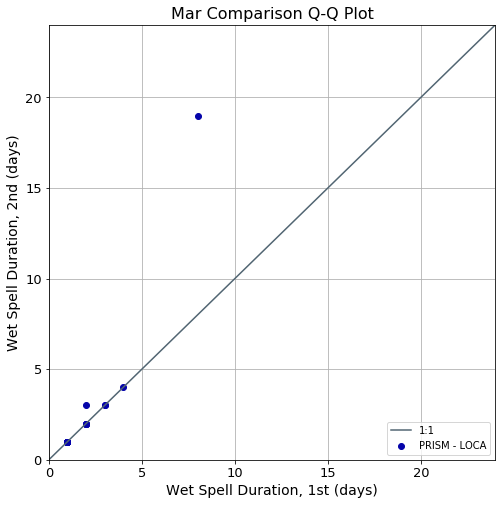

In [75]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarPRQs, MarLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

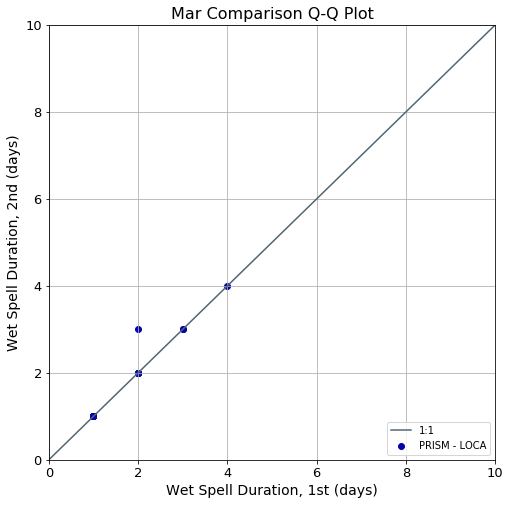

In [76]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarPRQs, MarLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

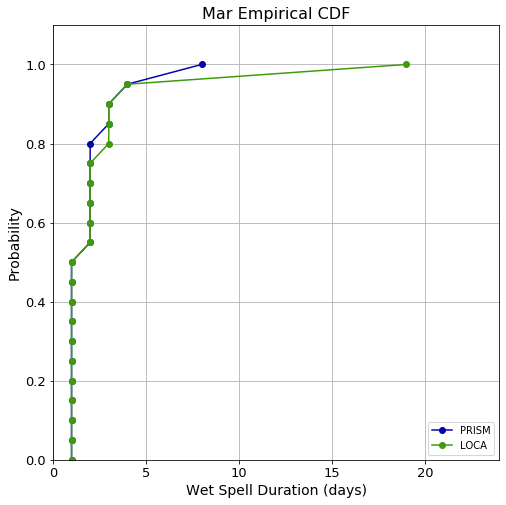

In [77]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MarPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( MarLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Mar Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Apr

In [78]:
AprNum = 4

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [79]:
AprPrBSCI = sstats.bayes_mvs( np.array( AprPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [80]:
AprPrBSCI

(Mean(statistic=1.7685950413223142, minmax=(1.7563247152946424, 1.780865367349986)),
 Variance(statistic=1.030230711231286, minmax=(1.0126175080052437, 1.0478439144573284)),
 Std_dev(statistic=1.0150028134105276, minmax=(1.006326382668991, 1.0236792441520641)))

In [81]:
AprPrBSCI[0][0], AprPrBSCI[0][1][0], AprPrBSCI[0][1][1]

(1.7685950413223142, 1.7563247152946424, 1.780865367349986)

In [82]:
SPRMean.append( AprPrBSCI[0][0] )
SPRMeanMinCI.append( AprPrBSCI[0][1][0] )
SPRMeanMaxCI.append( AprPrBSCI[0][1][1] )
SPRVar.append( AprPrBSCI[1][0] )
SPRVarMinCI.append( AprPrBSCI[1][1][0] )
SPRVarMaxCI.append( AprPrBSCI[1][1][1] )
SPRStd.append( AprPrBSCI[2][0] )
SPRStdMinCI.append( AprPrBSCI[2][1][0] )
SPRStdMaxCI.append( AprPrBSCI[2][1][1] )

In [83]:
AprLOBSCI = sstats.bayes_mvs( np.array( AprLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [84]:
SLOMean.append( AprLOBSCI[0][0] )
SLOMeanMinCI.append( AprLOBSCI[0][1][0] )
SLOMeanMaxCI.append( AprLOBSCI[0][1][1] )
SLOVar.append( AprLOBSCI[1][0] )
SLOVarMinCI.append( AprLOBSCI[1][1][0] )
SLOVarMaxCI.append( AprLOBSCI[1][1][1] )
SLOStd.append( AprLOBSCI[2][0] )
SLOStdMinCI.append( AprLOBSCI[2][1][0] )
SLOStdMaxCI.append( AprLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [85]:
AprTTPRtoLO = sstats.ttest_ind( np.array( AprPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AprLODF["Wet_Count"], dtype=np.int32 ) )

In [86]:
AprTTPRtoLOPval = AprTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % AprTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [87]:
AprMWUPRtoLO = sstats.mannwhitneyu( np.array( AprPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AprLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [88]:
AprMWUPRtoLOPval = AprMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % AprMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [89]:
AprKWPRtoLO = sstats.kruskal( np.array( AprPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AprLODF["Wet_Count"], dtype=np.int32 ) )

In [90]:
AprKWPRtoLOPval = AprKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % AprKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [91]:
AprLODF["Wet_Count"].median(), AprPRDF["Wet_Count"].median()

(2.0, 1.0)

#### Plots

In [92]:
AprPRQs = AprPRDF["Wet_Count"].quantile(q=nCompQs)
AprLOQs = AprLODF["Wet_Count"].quantile(q=nCompQs)

In [93]:
maxQs = max( AprPRQs.max(), AprLOQs.max() )
maxQs = maxQs + 3.0
maxQs

28.0

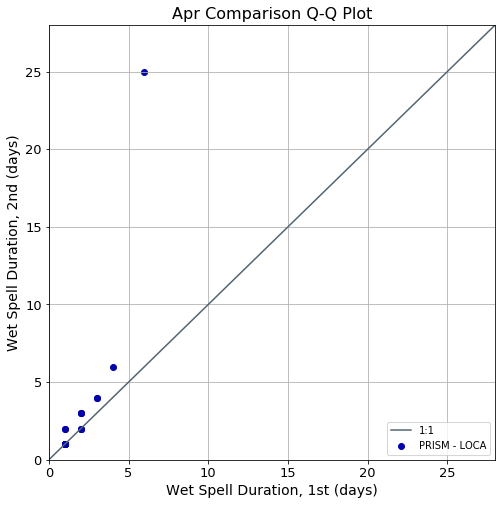

In [94]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprPRQs, AprLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

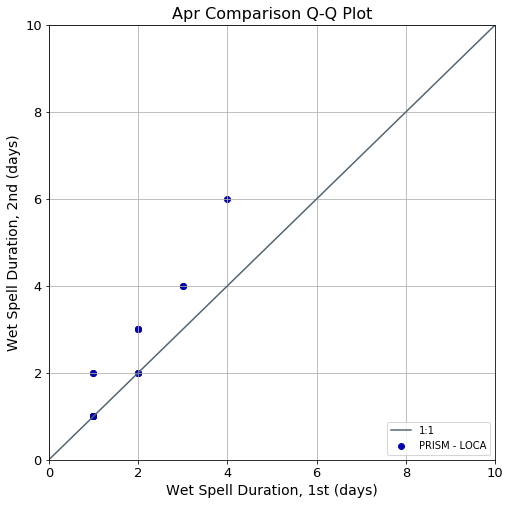

In [95]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprPRQs, AprLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

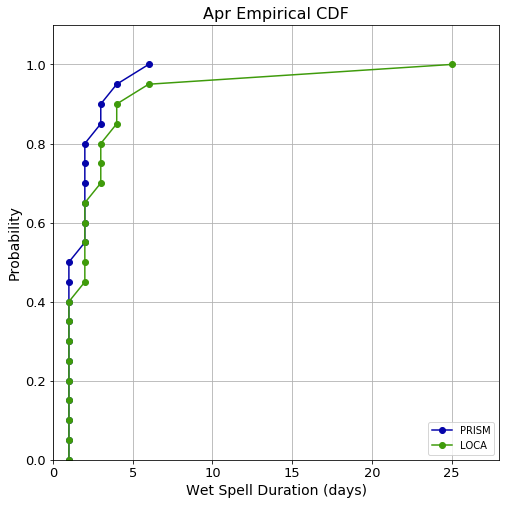

In [96]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AprPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( AprLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Apr Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### May

In [97]:
MayNum = 5

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [98]:
MayPrBSCI = sstats.bayes_mvs( np.array( MayPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [99]:
MayPrBSCI

(Mean(statistic=1.8621769144324931, minmax=(1.8485711045376594, 1.8757827243273268)),
 Variance(statistic=1.704796738006148, minmax=(1.679673494992225, 1.729919981020071)),
 Std_dev(statistic=1.3056786503600908, minmax=(1.2960578899199189, 1.3152994108002627)))

In [100]:
MayPrBSCI[0][0], MayPrBSCI[0][1][0], MayPrBSCI[0][1][1]

(1.8621769144324931, 1.8485711045376594, 1.8757827243273268)

In [101]:
SPRMean.append( MayPrBSCI[0][0] )
SPRMeanMinCI.append( MayPrBSCI[0][1][0] )
SPRMeanMaxCI.append( MayPrBSCI[0][1][1] )
SPRVar.append( MayPrBSCI[1][0] )
SPRVarMinCI.append( MayPrBSCI[1][1][0] )
SPRVarMaxCI.append( MayPrBSCI[1][1][1] )
SPRStd.append( MayPrBSCI[2][0] )
SPRStdMinCI.append( MayPrBSCI[2][1][0] )
SPRStdMaxCI.append( MayPrBSCI[2][1][1] )

In [102]:
MayLOBSCI = sstats.bayes_mvs( np.array( MayLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [103]:
SLOMean.append( MayLOBSCI[0][0] )
SLOMeanMinCI.append( MayLOBSCI[0][1][0] )
SLOMeanMaxCI.append( MayLOBSCI[0][1][1] )
SLOVar.append( MayLOBSCI[1][0] )
SLOVarMinCI.append( MayLOBSCI[1][1][0] )
SLOVarMaxCI.append( MayLOBSCI[1][1][1] )
SLOStd.append( MayLOBSCI[2][0] )
SLOStdMinCI.append( MayLOBSCI[2][1][0] )
SLOStdMaxCI.append( MayLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [104]:
MayTTPRtoLO = sstats.ttest_ind( np.array( MayPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MayLODF["Wet_Count"], dtype=np.int32 ) )

In [105]:
MayTTPRtoLOPval = MayTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % MayTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [106]:
MayMWUPRtoLO = sstats.mannwhitneyu( np.array( MayPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MayLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [107]:
MayMWUPRtoLOPval = MayMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % MayMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [108]:
MayKWPRtoLO = sstats.kruskal( np.array( MayPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MayLODF["Wet_Count"], dtype=np.int32 ) )

In [109]:
MayKWPRtoLOPval = MayKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % MayKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [110]:
MayLODF["Wet_Count"].median(), MayPRDF["Wet_Count"].median()

(2.0, 1.0)

#### Plots

In [111]:
MayPRQs = MayPRDF["Wet_Count"].quantile(q=nCompQs)
MayLOQs = MayLODF["Wet_Count"].quantile(q=nCompQs)

In [112]:
maxQs = max( MayPRQs.max(), MayLOQs.max() )
maxQs = maxQs + 4.0
maxQs

41.0

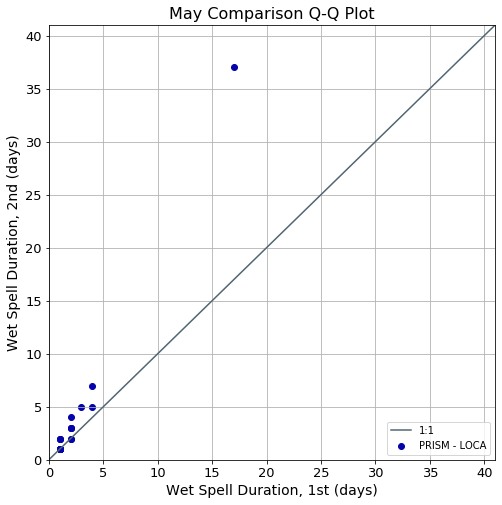

In [113]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayPRQs, MayLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

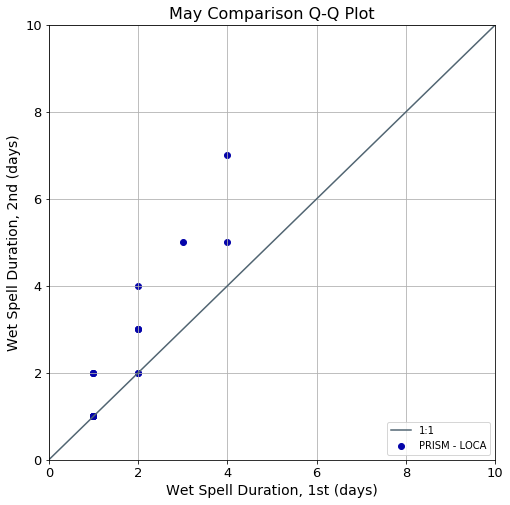

In [114]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayPRQs, MayLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

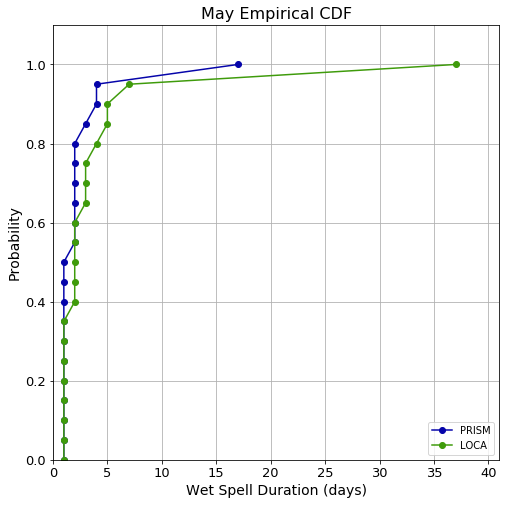

In [115]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MayPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( MayLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('May Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jun

In [116]:
JunNum = 6

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [117]:
JunPrBSCI = sstats.bayes_mvs( np.array( JunPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [118]:
JunPrBSCI

(Mean(statistic=2.0718902519456535, minmax=(2.0541040403010005, 2.0896764635903065)),
 Variance(statistic=2.659256010116029, minmax=(2.6182376278241692, 2.7002743924078887)),
 Std_dev(statistic=1.6307225423461924, minmax=(1.618145791480639, 1.6432992932117458)))

In [119]:
JunPrBSCI[0][0], JunPrBSCI[0][1][0], JunPrBSCI[0][1][1]

(2.0718902519456535, 2.0541040403010005, 2.0896764635903065)

In [120]:
SPRMean.append( JunPrBSCI[0][0] )
SPRMeanMinCI.append( JunPrBSCI[0][1][0] )
SPRMeanMaxCI.append( JunPrBSCI[0][1][1] )
SPRVar.append( JunPrBSCI[1][0] )
SPRVarMinCI.append( JunPrBSCI[1][1][0] )
SPRVarMaxCI.append( JunPrBSCI[1][1][1] )
SPRStd.append( JunPrBSCI[2][0] )
SPRStdMinCI.append( JunPrBSCI[2][1][0] )
SPRStdMaxCI.append( JunPrBSCI[2][1][1] )

In [121]:
JunLOBSCI = sstats.bayes_mvs( np.array( JunLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [122]:
SLOMean.append( JunLOBSCI[0][0] )
SLOMeanMinCI.append( JunLOBSCI[0][1][0] )
SLOMeanMaxCI.append( JunLOBSCI[0][1][1] )
SLOVar.append( JunLOBSCI[1][0] )
SLOVarMinCI.append( JunLOBSCI[1][1][0] )
SLOVarMaxCI.append( JunLOBSCI[1][1][1] )
SLOStd.append( JunLOBSCI[2][0] )
SLOStdMinCI.append( JunLOBSCI[2][1][0] )
SLOStdMaxCI.append( JunLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [123]:
JunTTPRtoLO = sstats.ttest_ind( np.array( JunPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JunLODF["Wet_Count"], dtype=np.int32 ) )

In [124]:
JunTTPRtoLOPval = JunTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % JunTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [125]:
JunMWUPRtoLO = sstats.mannwhitneyu( np.array( JunPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JunLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [126]:
JunMWUPRtoLOPval = JunMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % JunMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [127]:
JunKWPRtoLO = sstats.kruskal( np.array( JunPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JunLODF["Wet_Count"], dtype=np.int32 ) )

In [128]:
JunKWPRtoLOPval = JunKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % JunKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [129]:
JunLODF["Wet_Count"].median(), JunPRDF["Wet_Count"].median()

(2.0, 2.0)

#### Plots

In [130]:
JunPRQs = JunPRDF["Wet_Count"].quantile(q=nCompQs)
JunLOQs = JunLODF["Wet_Count"].quantile(q=nCompQs)

In [131]:
maxQs = max( JunPRQs.max(), JunLOQs.max() )
maxQs = maxQs + 1.0
maxQs

53.0

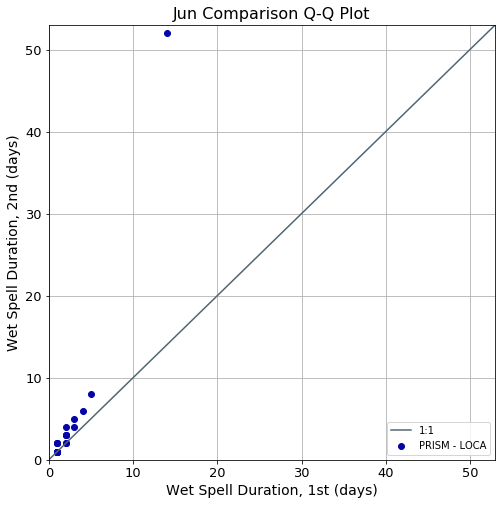

In [132]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunPRQs, JunLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

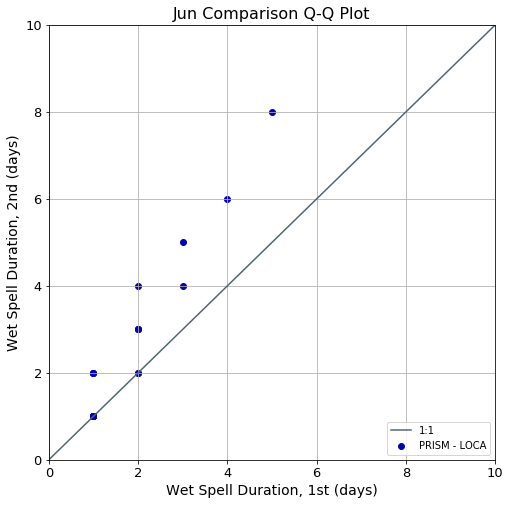

In [133]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunPRQs, JunLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

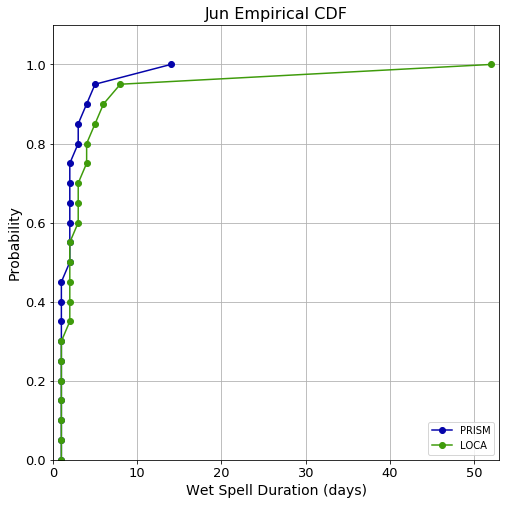

In [134]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JunPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( JunLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Jun Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jul

In [135]:
JulNum = 7

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [136]:
JulPrBSCI = sstats.bayes_mvs( np.array( JulPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [137]:
JulPrBSCI

(Mean(statistic=2.0567093573324104, minmax=(2.038038755943696, 2.075379958721125)),
 Variance(statistic=2.2333711031350085, minmax=(2.1939114056760554, 2.2728308005939617)),
 Std_dev(statistic=1.4944467548678368, minmax=(1.4812446460170459, 1.5076488637186278)))

In [138]:
JulPrBSCI[0][0], JulPrBSCI[0][1][0], JulPrBSCI[0][1][1]

(2.0567093573324104, 2.038038755943696, 2.075379958721125)

In [139]:
SPRMean.append( JulPrBSCI[0][0] )
SPRMeanMinCI.append( JulPrBSCI[0][1][0] )
SPRMeanMaxCI.append( JulPrBSCI[0][1][1] )
SPRVar.append( JulPrBSCI[1][0] )
SPRVarMinCI.append( JulPrBSCI[1][1][0] )
SPRVarMaxCI.append( JulPrBSCI[1][1][1] )
SPRStd.append( JulPrBSCI[2][0] )
SPRStdMinCI.append( JulPrBSCI[2][1][0] )
SPRStdMaxCI.append( JulPrBSCI[2][1][1] )

In [140]:
JulLOBSCI = sstats.bayes_mvs( np.array( JulLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [141]:
SLOMean.append( JulLOBSCI[0][0] )
SLOMeanMinCI.append( JulLOBSCI[0][1][0] )
SLOMeanMaxCI.append( JulLOBSCI[0][1][1] )
SLOVar.append( JulLOBSCI[1][0] )
SLOVarMinCI.append( JulLOBSCI[1][1][0] )
SLOVarMaxCI.append( JulLOBSCI[1][1][1] )
SLOStd.append( JulLOBSCI[2][0] )
SLOStdMinCI.append( JulLOBSCI[2][1][0] )
SLOStdMaxCI.append( JulLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [142]:
JulTTPRtoLO = sstats.ttest_ind( np.array( JulPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JulLODF["Wet_Count"], dtype=np.int32 ) )

In [143]:
JulTTPRtoLOPval = JulTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % JulTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 3.38112e-232


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [144]:
JulMWUPRtoLO = sstats.mannwhitneyu( np.array( JulPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JulLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [145]:
JulMWUPRtoLOPval = JulMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % JulMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 3.81591e-184


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [146]:
JulKWPRtoLO = sstats.kruskal( np.array( JulPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JulLODF["Wet_Count"], dtype=np.int32 ) )

In [147]:
JulKWPRtoLOPval = JulKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % JulKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [148]:
JulLODF["Wet_Count"].median(), JulPRDF["Wet_Count"].median()

(2.0, 2.0)

#### Plots

In [149]:
JulPRQs = JulPRDF["Wet_Count"].quantile(q=nCompQs)
JulLOQs = JulLODF["Wet_Count"].quantile(q=nCompQs)

In [150]:
maxQs = max( JulPRQs.max(), JulLOQs.max() )
maxQs = maxQs + 1.0
maxQs

40.0

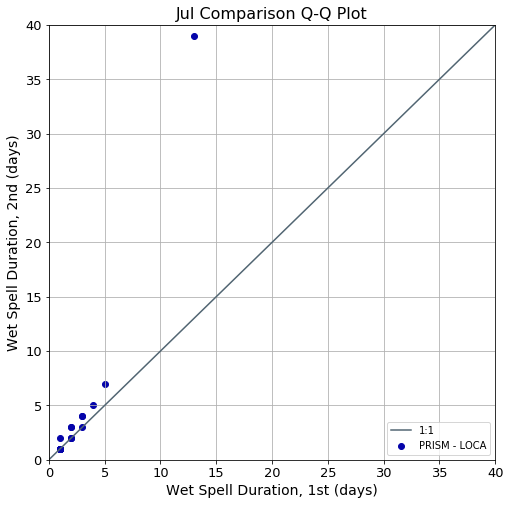

In [151]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulPRQs, JulLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

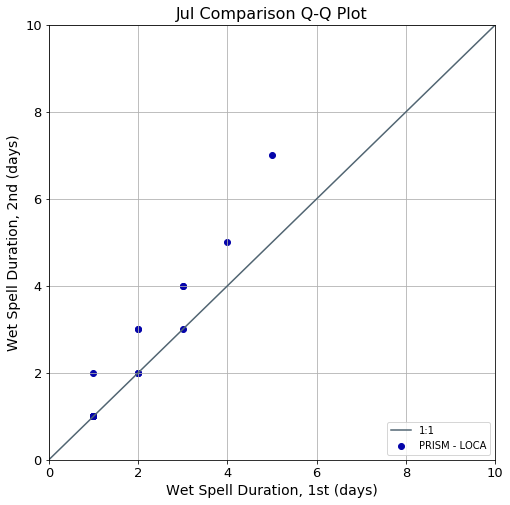

In [152]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulPRQs, JulLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

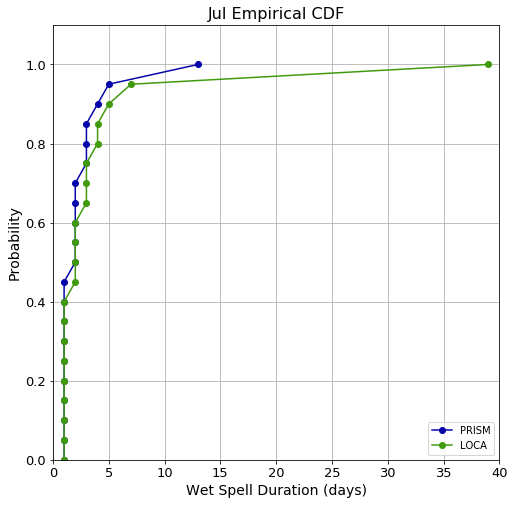

In [153]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JulPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( JulLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Jul Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Aug

In [154]:
AugNum = 8

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [155]:
AugPrBSCI = sstats.bayes_mvs( np.array( AugPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [156]:
AugPrBSCI

(Mean(statistic=2.0984218648877384, minmax=(2.079144873782242, 2.117698855993235)),
 Variance(statistic=2.7589196979696795, minmax=(2.713637888315637, 2.804201507623722)),
 Std_dev(statistic=1.6609996080582559, minmax=(1.6473687169266866, 1.674630499189825)))

In [157]:
AugPrBSCI[0][0], AugPrBSCI[0][1][0], AugPrBSCI[0][1][1]

(2.0984218648877384, 2.079144873782242, 2.117698855993235)

In [158]:
SPRMean.append( AugPrBSCI[0][0] )
SPRMeanMinCI.append( AugPrBSCI[0][1][0] )
SPRMeanMaxCI.append( AugPrBSCI[0][1][1] )
SPRVar.append( AugPrBSCI[1][0] )
SPRVarMinCI.append( AugPrBSCI[1][1][0] )
SPRVarMaxCI.append( AugPrBSCI[1][1][1] )
SPRStd.append( AugPrBSCI[2][0] )
SPRStdMinCI.append( AugPrBSCI[2][1][0] )
SPRStdMaxCI.append( AugPrBSCI[2][1][1] )

In [159]:
AugLOBSCI = sstats.bayes_mvs( np.array( AugLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [160]:
SLOMean.append( AugLOBSCI[0][0] )
SLOMeanMinCI.append( AugLOBSCI[0][1][0] )
SLOMeanMaxCI.append( AugLOBSCI[0][1][1] )
SLOVar.append( AugLOBSCI[1][0] )
SLOVarMinCI.append( AugLOBSCI[1][1][0] )
SLOVarMaxCI.append( AugLOBSCI[1][1][1] )
SLOStd.append( AugLOBSCI[2][0] )
SLOStdMinCI.append( AugLOBSCI[2][1][0] )
SLOStdMaxCI.append( AugLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [161]:
AugTTPRtoLO = sstats.ttest_ind( np.array( AugPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AugLODF["Wet_Count"], dtype=np.int32 ) )

In [162]:
AugTTPRtoLOPval = AugTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % AugTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 3.26287e-243


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [163]:
AugMWUPRtoLO = sstats.mannwhitneyu( np.array( AugPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AugLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [164]:
AugMWUPRtoLOPval = AugMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % AugMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 6.01546e-191


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [165]:
AugKWPRtoLO = sstats.kruskal( np.array( AugPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AugLODF["Wet_Count"], dtype=np.int32 ) )

In [166]:
AugKWPRtoLOPval = AugKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % AugKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [167]:
AugLODF["Wet_Count"].median(), AugPRDF["Wet_Count"].median()

(2.0, 2.0)

#### Plots

In [168]:
AugPRQs = AugPRDF["Wet_Count"].quantile(q=nCompQs)
AugLOQs = AugLODF["Wet_Count"].quantile(q=nCompQs)

In [169]:
maxQs = max( AugPRQs.max(), AugLOQs.max() )
maxQs = maxQs + 1.0
maxQs

31.0

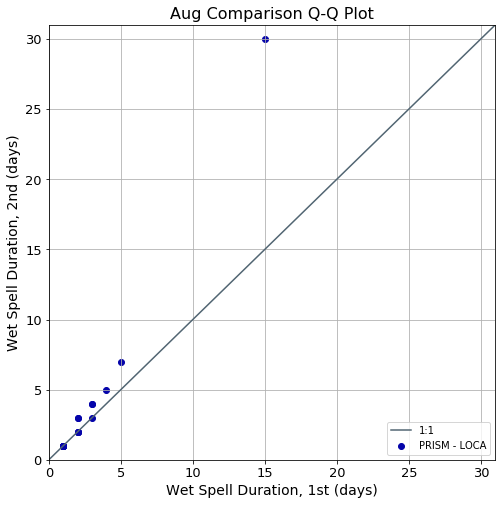

In [170]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugPRQs, AugLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

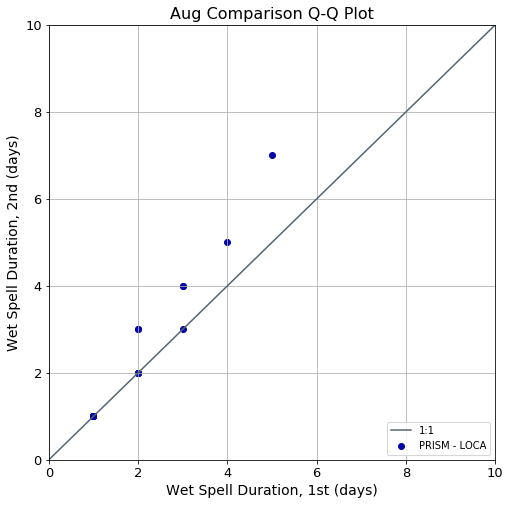

In [171]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugPRQs, AugLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

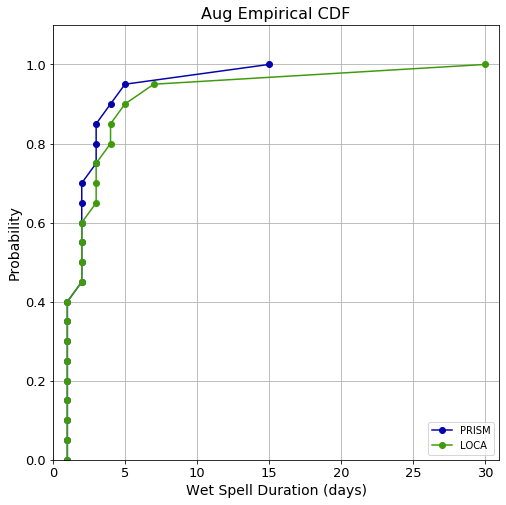

In [172]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AugPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( AugLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Aug Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Sep

In [173]:
SepNum = 9

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [174]:
SepPrBSCI = sstats.bayes_mvs( np.array( SepPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [175]:
SepPrBSCI

(Mean(statistic=1.863288580915259, minmax=(1.8495638766562548, 1.8770132851742634)),
 Variance(statistic=1.4468313776228408, minmax=(1.4234845997017642, 1.4701781555439173)),
 Std_dev(statistic=1.202843039478901, minmax=(1.1931382080275792, 1.2125478709302226)))

In [176]:
SepPrBSCI[0][0], SepPrBSCI[0][1][0], SepPrBSCI[0][1][1]

(1.863288580915259, 1.8495638766562548, 1.8770132851742634)

In [177]:
SPRMean.append( SepPrBSCI[0][0] )
SPRMeanMinCI.append( SepPrBSCI[0][1][0] )
SPRMeanMaxCI.append( SepPrBSCI[0][1][1] )
SPRVar.append( SepPrBSCI[1][0] )
SPRVarMinCI.append( SepPrBSCI[1][1][0] )
SPRVarMaxCI.append( SepPrBSCI[1][1][1] )
SPRStd.append( SepPrBSCI[2][0] )
SPRStdMinCI.append( SepPrBSCI[2][1][0] )
SPRStdMaxCI.append( SepPrBSCI[2][1][1] )

In [178]:
SepLOBSCI = sstats.bayes_mvs( np.array( SepLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [179]:
SLOMean.append( SepLOBSCI[0][0] )
SLOMeanMinCI.append( SepLOBSCI[0][1][0] )
SLOMeanMaxCI.append( SepLOBSCI[0][1][1] )
SLOVar.append( SepLOBSCI[1][0] )
SLOVarMinCI.append( SepLOBSCI[1][1][0] )
SLOVarMaxCI.append( SepLOBSCI[1][1][1] )
SLOStd.append( SepLOBSCI[2][0] )
SLOStdMinCI.append( SepLOBSCI[2][1][0] )
SLOStdMaxCI.append( SepLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [180]:
SepTTPRtoLO = sstats.ttest_ind( np.array( SepPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( SepLODF["Wet_Count"], dtype=np.int32 ) )

In [181]:
SepTTPRtoLOPval = SepTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % SepTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [182]:
SepMWUPRtoLO = sstats.mannwhitneyu( np.array( SepPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( SepLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [183]:
SepMWUPRtoLOPval = SepMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % SepMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [184]:
SepKWPRtoLO = sstats.kruskal( np.array( SepPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( SepLODF["Wet_Count"], dtype=np.int32 ) )

In [185]:
SepKWPRtoLOPval = SepKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % SepKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [186]:
SepLODF["Wet_Count"].median(), SepPRDF["Wet_Count"].median()

(2.0, 2.0)

#### Plots

In [187]:
SepPRQs = SepPRDF["Wet_Count"].quantile(q=nCompQs)
SepLOQs = SepLODF["Wet_Count"].quantile(q=nCompQs)

In [188]:
maxQs = max( SepPRQs.max(), SepLOQs.max() )
maxQs = maxQs + 3.0
maxQs

34.0

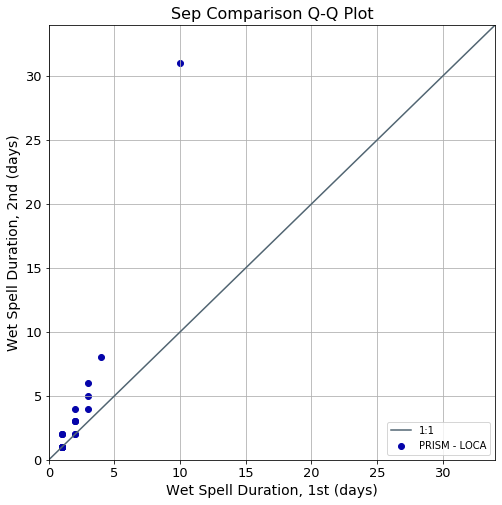

In [189]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepPRQs, SepLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

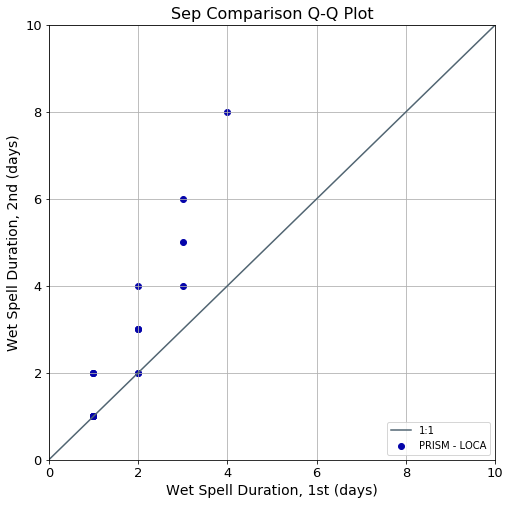

In [190]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepPRQs, SepLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

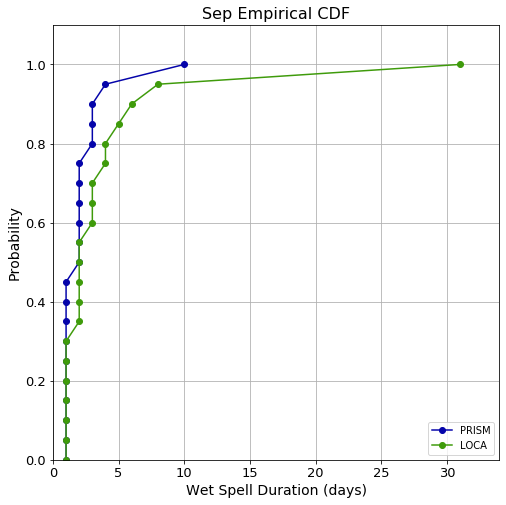

In [191]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SepPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( SepLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Sep Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Oct

In [192]:
OctNum = 10

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [193]:
OctPrBSCI = sstats.bayes_mvs( np.array( OctPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [194]:
OctPrBSCI

(Mean(statistic=2.170252092211326, minmax=(2.1482663374977973, 2.192237846924855)),
 Variance(statistic=3.4797681399716205, minmax=(3.4217676676812503, 3.5377686122619907)),
 Std_dev(statistic=1.8654136645719148, minmax=(1.8498673883244745, 1.8809599408193551)))

In [195]:
OctPrBSCI[0][0], OctPrBSCI[0][1][0], OctPrBSCI[0][1][1]

(2.170252092211326, 2.1482663374977973, 2.192237846924855)

In [196]:
SPRMean.append( OctPrBSCI[0][0] )
SPRMeanMinCI.append( OctPrBSCI[0][1][0] )
SPRMeanMaxCI.append( OctPrBSCI[0][1][1] )
SPRVar.append( OctPrBSCI[1][0] )
SPRVarMinCI.append( OctPrBSCI[1][1][0] )
SPRVarMaxCI.append( OctPrBSCI[1][1][1] )
SPRStd.append( OctPrBSCI[2][0] )
SPRStdMinCI.append( OctPrBSCI[2][1][0] )
SPRStdMaxCI.append( OctPrBSCI[2][1][1] )

In [197]:
OctLOBSCI = sstats.bayes_mvs( np.array( OctLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [198]:
SLOMean.append( OctLOBSCI[0][0] )
SLOMeanMinCI.append( OctLOBSCI[0][1][0] )
SLOMeanMaxCI.append( OctLOBSCI[0][1][1] )
SLOVar.append( OctLOBSCI[1][0] )
SLOVarMinCI.append( OctLOBSCI[1][1][0] )
SLOVarMaxCI.append( OctLOBSCI[1][1][1] )
SLOStd.append( OctLOBSCI[2][0] )
SLOStdMinCI.append( OctLOBSCI[2][1][0] )
SLOStdMaxCI.append( OctLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [199]:
OctTTPRtoLO = sstats.ttest_ind( np.array( OctPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( OctLODF["Wet_Count"], dtype=np.int32 ) )

In [200]:
OctTTPRtoLOPval = OctTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % OctTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 3.966e-132


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [201]:
OctMWUPRtoLO = sstats.mannwhitneyu( np.array( OctPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( OctLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [202]:
OctMWUPRtoLOPval = OctMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % OctMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 9.75895e-234


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [203]:
OctKWPRtoLO = sstats.kruskal( np.array( OctPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( OctLODF["Wet_Count"], dtype=np.int32 ) )

In [204]:
OctKWPRtoLOPval = OctKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % OctKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [205]:
OctLODF["Wet_Count"].median(), OctPRDF["Wet_Count"].median()

(2.0, 2.0)

#### Plots

In [206]:
OctPRQs = OctPRDF["Wet_Count"].quantile(q=nCompQs)
OctLOQs = OctLODF["Wet_Count"].quantile(q=nCompQs)

In [207]:
maxQs = max( OctPRQs.max(), OctLOQs.max() )
maxQs = maxQs + 3.0
maxQs

22.0

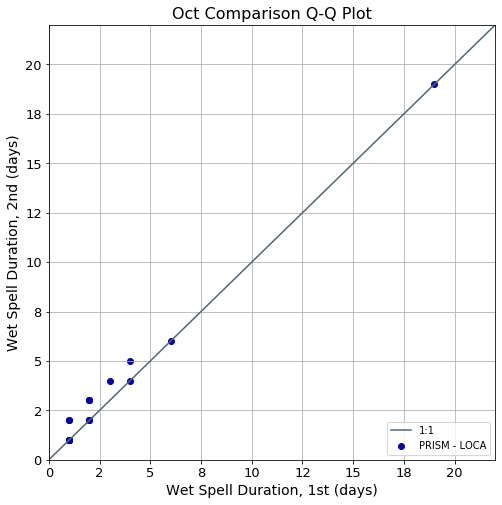

In [208]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctPRQs, OctLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

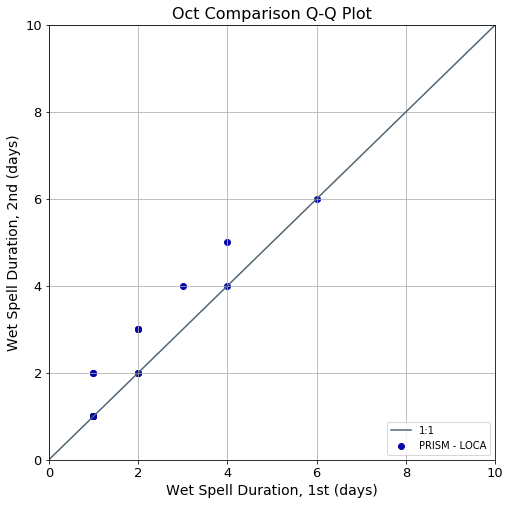

In [209]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctPRQs, OctLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

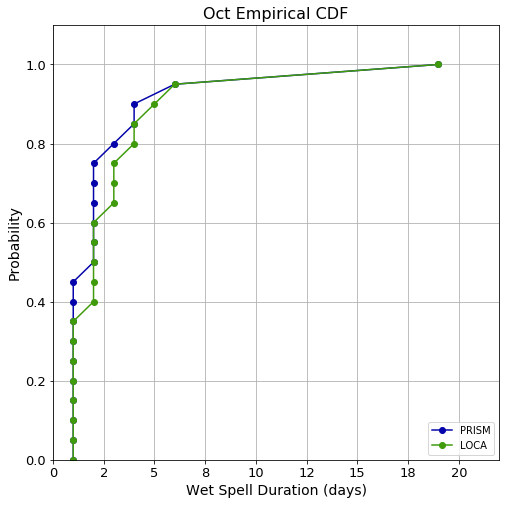

In [210]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( OctPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( OctLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Oct Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Nov

In [211]:
NovNum = 11

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [212]:
NovPrBSCI = sstats.bayes_mvs( np.array( NovPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [213]:
NovPrBSCI

(Mean(statistic=1.9878320225552752, minmax=(1.9702565817041706, 2.00540746340638)),
 Variance(statistic=1.5388043071449078, minmax=(1.5079715102680278, 1.5696371040217878)),
 Std_dev(statistic=1.2404855126703043, minmax=(1.228057799262145, 1.2529132260784634)))

In [214]:
NovPrBSCI[0][0], NovPrBSCI[0][1][0], NovPrBSCI[0][1][1]

(1.9878320225552752, 1.9702565817041706, 2.00540746340638)

In [215]:
SPRMean.append( NovPrBSCI[0][0] )
SPRMeanMinCI.append( NovPrBSCI[0][1][0] )
SPRMeanMaxCI.append( NovPrBSCI[0][1][1] )
SPRVar.append( NovPrBSCI[1][0] )
SPRVarMinCI.append( NovPrBSCI[1][1][0] )
SPRVarMaxCI.append( NovPrBSCI[1][1][1] )
SPRStd.append( NovPrBSCI[2][0] )
SPRStdMinCI.append( NovPrBSCI[2][1][0] )
SPRStdMaxCI.append( NovPrBSCI[2][1][1] )

In [216]:
NovLOBSCI = sstats.bayes_mvs( np.array( NovLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [217]:
SLOMean.append( NovLOBSCI[0][0] )
SLOMeanMinCI.append( NovLOBSCI[0][1][0] )
SLOMeanMaxCI.append( NovLOBSCI[0][1][1] )
SLOVar.append( NovLOBSCI[1][0] )
SLOVarMinCI.append( NovLOBSCI[1][1][0] )
SLOVarMaxCI.append( NovLOBSCI[1][1][1] )
SLOStd.append( NovLOBSCI[2][0] )
SLOStdMinCI.append( NovLOBSCI[2][1][0] )
SLOStdMaxCI.append( NovLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [218]:
NovTTPRtoLO = sstats.ttest_ind( np.array( NovPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( NovLODF["Wet_Count"], dtype=np.int32 ) )

In [219]:
NovTTPRtoLOPval = NovTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % NovTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 1.04311e-21


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [220]:
NovMWUPRtoLO = sstats.mannwhitneyu( np.array( NovPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( NovLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [221]:
NovMWUPRtoLOPval = NovMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % NovMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 6.57136e-13


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [222]:
NovKWPRtoLO = sstats.kruskal( np.array( NovPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( NovLODF["Wet_Count"], dtype=np.int32 ) )

In [223]:
NovKWPRtoLOPval = NovKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % NovKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [224]:
NovLODF["Wet_Count"].median(), NovPRDF["Wet_Count"].median()

(2.0, 2.0)

#### Plots

In [225]:
NovPRQs = NovPRDF["Wet_Count"].quantile(q=nCompQs)
NovLOQs = NovLODF["Wet_Count"].quantile(q=nCompQs)

In [226]:
maxQs = max( NovPRQs.max(), NovLOQs.max() )
maxQs = maxQs + 2.0
maxQs

19.0

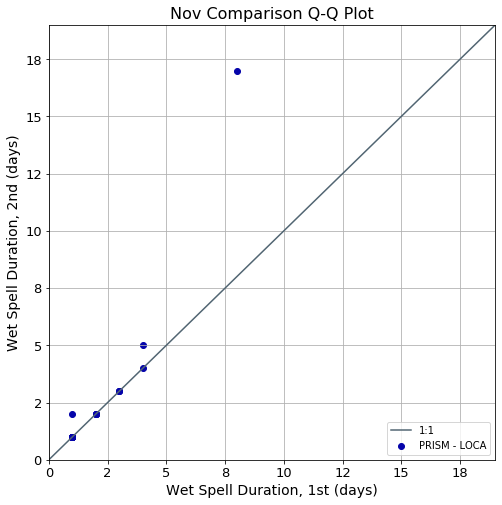

In [227]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovPRQs, NovLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

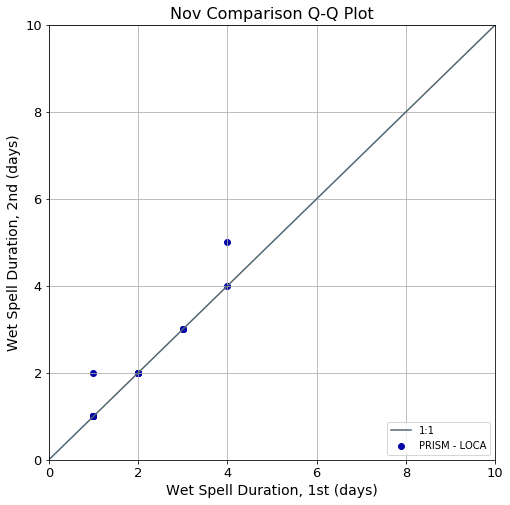

In [228]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovPRQs, NovLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

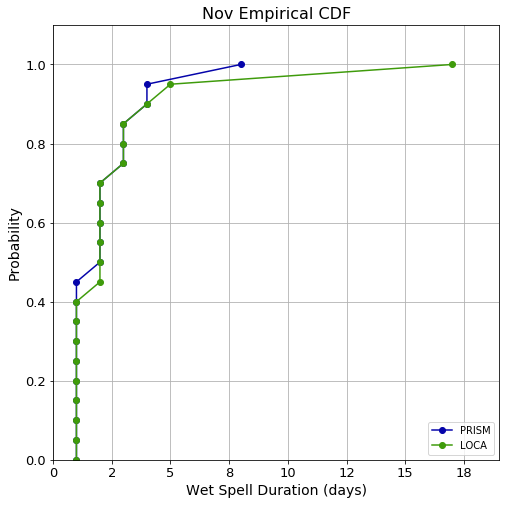

In [229]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( NovPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( NovLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Nov Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Dec

In [230]:
DecNum = 12

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [231]:
DecPrBSCI = sstats.bayes_mvs( np.array( DecPRDF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [232]:
DecPrBSCI

(Mean(statistic=1.8232858803021499, minmax=(1.8068837149751842, 1.8396880456291156)),
 Variance(statistic=1.3690481222236441, minmax=(1.3419071412944357, 1.3961891031528524)),
 Std_dev(statistic=1.1700632983833157, minmax=(1.1584652160544753, 1.181661380712156)))

In [233]:
DecPrBSCI[0][0], DecPrBSCI[0][1][0], DecPrBSCI[0][1][1]

(1.8232858803021499, 1.8068837149751842, 1.8396880456291156)

In [234]:
SPRMean.append( DecPrBSCI[0][0] )
SPRMeanMinCI.append( DecPrBSCI[0][1][0] )
SPRMeanMaxCI.append( DecPrBSCI[0][1][1] )
SPRVar.append( DecPrBSCI[1][0] )
SPRVarMinCI.append( DecPrBSCI[1][1][0] )
SPRVarMaxCI.append( DecPrBSCI[1][1][1] )
SPRStd.append( DecPrBSCI[2][0] )
SPRStdMinCI.append( DecPrBSCI[2][1][0] )
SPRStdMaxCI.append( DecPrBSCI[2][1][1] )

In [235]:
DecLOBSCI = sstats.bayes_mvs( np.array( DecLODF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [236]:
SLOMean.append( DecLOBSCI[0][0] )
SLOMeanMinCI.append( DecLOBSCI[0][1][0] )
SLOMeanMaxCI.append( DecLOBSCI[0][1][1] )
SLOVar.append( DecLOBSCI[1][0] )
SLOVarMinCI.append( DecLOBSCI[1][1][0] )
SLOVarMaxCI.append( DecLOBSCI[1][1][1] )
SLOStd.append( DecLOBSCI[2][0] )
SLOStdMinCI.append( DecLOBSCI[2][1][0] )
SLOStdMaxCI.append( DecLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [237]:
DecTTPRtoLO = sstats.ttest_ind( np.array( DecPRDF["Wet_Count"], dtype=np.int32 ), 
                                np.array( DecLODF["Wet_Count"], dtype=np.int32 ) )

In [238]:
DecTTPRtoLOPval = DecTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % DecTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 8.36215e-11


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [239]:
DecMWUPRtoLO = sstats.mannwhitneyu( np.array( DecPRDF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( DecLODF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [240]:
DecMWUPRtoLOPval = DecMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % DecMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 2.59514e-07


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [241]:
DecKWPRtoLO = sstats.kruskal( np.array( DecPRDF["Wet_Count"], dtype=np.int32 ), 
                              np.array( DecLODF["Wet_Count"], dtype=np.int32 ) )

In [242]:
DecKWPRtoLOPval = DecKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % DecKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [243]:
DecLODF["Wet_Count"].median(), DecPRDF["Wet_Count"].median()

(1.0, 1.0)

#### Plots

In [244]:
DecPRQs = DecPRDF["Wet_Count"].quantile(q=nCompQs)
DecLOQs = DecLODF["Wet_Count"].quantile(q=nCompQs)

In [245]:
maxQs = max( DecPRQs.max(), DecLOQs.max() )
maxQs = maxQs + 2.0
maxQs

16.0

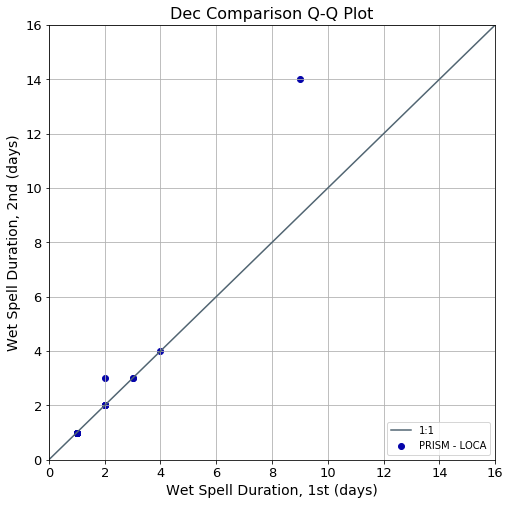

In [246]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecPRQs, DecLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

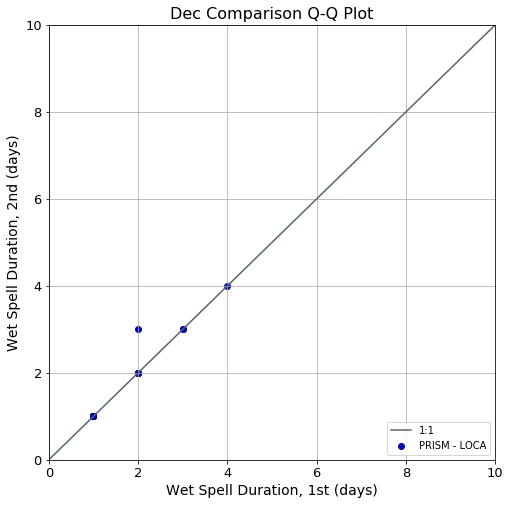

In [247]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecPRQs, DecLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 10.0) )
ax11.set_ylim( (0.0, 10.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

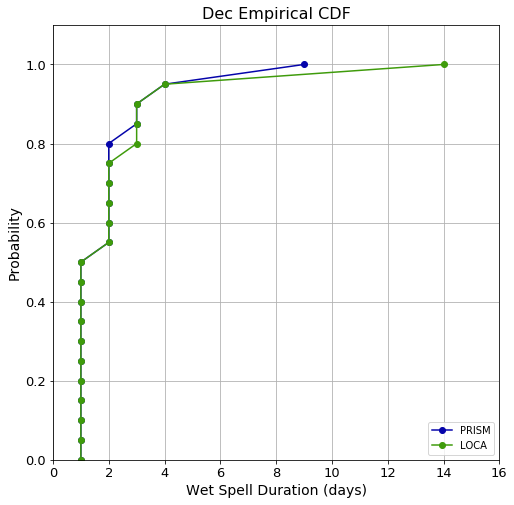

In [248]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( DecPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( DecLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Dec Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Final Collations, Plots, and Outputs

In [249]:
DataDict = { "Min CI Mean" : np.array( SPRMeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SPRMean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SPRMeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SPRVarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SPRVar, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SPRVarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SPRStdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SPRStd, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SPRStdMaxCI, dtype=np.float32 ), #8
}
PRBayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [250]:
BSCIHds = list( PRBayStatsCIDF.columns )

In [251]:
display( HTML( PRBayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,1.851690,1.866392,1.881094,1.333088,1.357311,1.381534,1.154641,1.165037,1.175433
2,1.802527,1.815739,1.828951,1.089624,1.109304,1.128983,1.043893,1.053235,1.062577
3,1.749549,1.761789,1.774028,1.139216,1.157842,1.176467,1.067376,1.076030,1.084685
4,1.756325,1.768595,1.780865,1.012617,1.030231,1.047844,1.006326,1.015003,1.023679
5,1.848571,1.862177,1.875783,1.679674,1.704797,1.729920,1.296058,1.305679,1.315299
6,2.054104,2.071890,2.089676,2.618238,2.659256,2.700274,1.618146,1.630723,1.643299
7,2.038039,2.056709,2.075380,2.193911,2.233371,2.272831,1.481245,1.494447,1.507649
8,2.079145,2.098422,2.117699,2.713638,2.758920,2.804202,1.647369,1.661000,1.674631
9,1.849564,1.863289,1.877013,1.423485,1.446831,1.470178,1.193138,1.202843,1.212548
10,2.148266,2.170252,2.192238,3.421768,3.479768,3.537769,1.849867,1.865414,1.880960


In [252]:
DataDict = { "Min CI Mean" : np.array( SLOMeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SLOMean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SLOMeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SLOVarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SLOVar, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SLOVarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SLOStdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SLOStd, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SLOStdMaxCI, dtype=np.float32 ), #8
}
LOBayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [253]:
display( HTML( LOBayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,1.860158,1.862078,1.863998,1.378317,1.381508,1.384699,1.174018,1.175376,1.176733
2,1.984072,1.986150,1.988227,1.632790,1.636548,1.640306,1.277807,1.279276,1.280745
3,1.892755,1.894751,1.896747,1.613699,1.617288,1.620877,1.270315,1.271726,1.273137
4,2.299245,2.301874,2.304502,3.183703,3.190343,3.196983,1.784294,1.786153,1.788012
5,2.689106,2.692112,2.695119,4.902743,4.912168,4.921593,2.214215,2.216341,2.218467
6,2.911320,2.915002,2.918684,6.194769,6.207742,6.220715,2.488931,2.491534,2.494138
7,2.622509,2.626201,2.629894,5.259205,5.271194,5.283182,2.293297,2.295908,2.298519
8,2.617833,2.621325,2.624817,4.887104,4.898033,4.908961,2.210681,2.213150,2.215619
9,2.925941,2.929591,2.933240,6.027661,6.040346,6.053030,2.455131,2.457711,2.460292
10,2.494637,2.497473,2.500309,3.418667,3.426091,3.433514,1.848965,1.850970,1.852975


In [256]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "WetDayComp_LOCA_1981-2011.xlsx" ) )
with pd.ExcelWriter( OutFiler ) as writer:
    PRBayStatsCIDF.to_excel( writer, sheet_name="PRISM_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    LOBayStatsCIDF.to_excel( writer, sheet_name="LOCA_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )

Plot the monthly confidence intervals with statistic

In [257]:
PRMeanCI = np.append( np.stack( [np.array(PRBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(PRBayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PRBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(PRBayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PRMeanCI = np.vstack( [PRMeanCI[:,:], PRMeanCI[0,:]] )

In [258]:
LOMeanCI = np.append( np.stack( [np.array(LOBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(LOBayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LOBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(LOBayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LOMeanCI = np.vstack( [LOMeanCI[:,:], LOMeanCI[0,:]] )

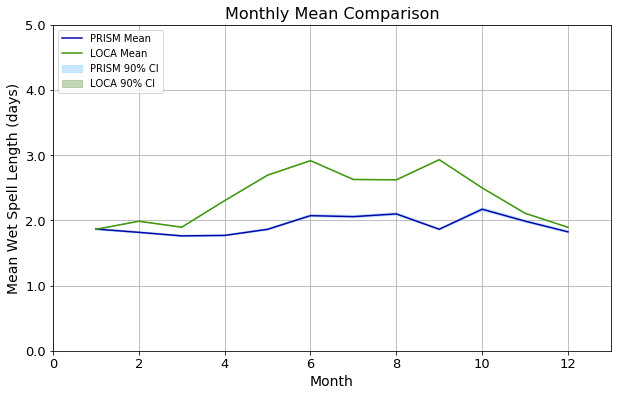

In [259]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PRMeanCI[:,0], PRMeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LOMeanCI[:,0], LOMeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 5.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

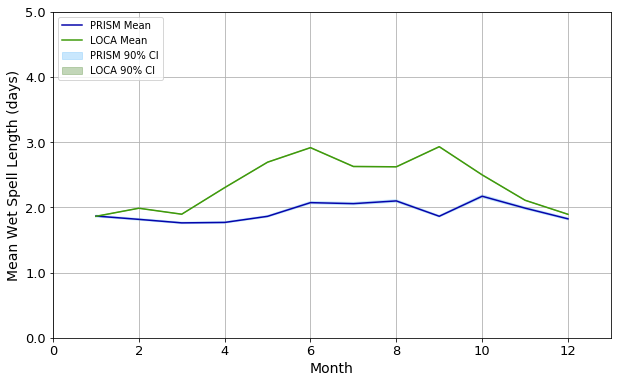

In [260]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PRMeanCI[:,0], PRMeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LOMeanCI[:,0], LOMeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 5.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [261]:
PRVarCI = np.append( np.stack( [np.array(PRBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(PRBayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PRBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(PRBayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PRVarCI = np.vstack( [PRVarCI[:,:], PRVarCI[0,:]] )

In [262]:
LOVarCI = np.append( np.stack( [np.array(LOBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(LOBayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LOBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(LOBayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LOVarCI = np.vstack( [LOVarCI[:,:], LOVarCI[0,:]] )

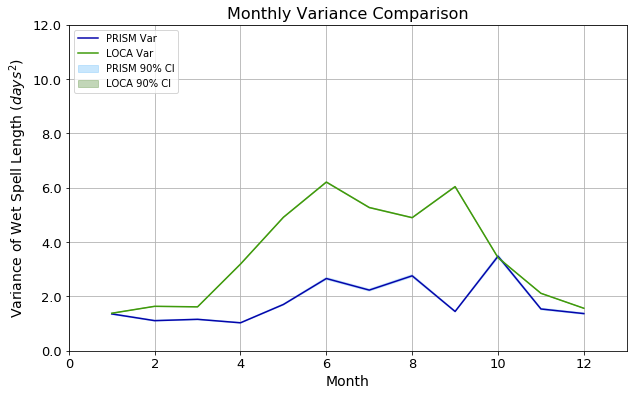

In [263]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PRVarCI[:,0], PRVarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LOVarCI[:,0], LOVarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

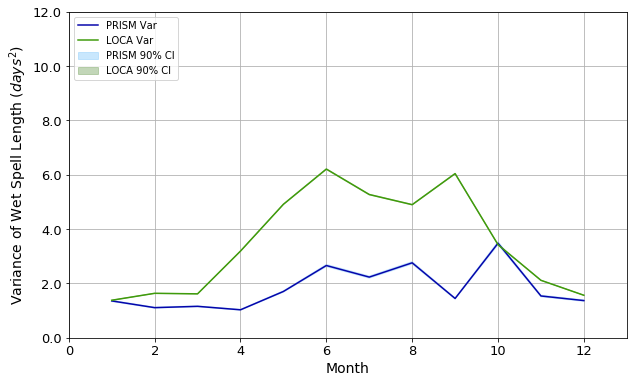

In [264]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PRVarCI[:,0], PRVarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LOVarCI[:,0], LOVarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )